In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
import numpy as np
from glob import glob
from matplotlib import pyplot as plt

In [2]:
# resize all images to this
img_size = [224, 224]

train_path = './data/Train'
validation_path = './data/Test'

In [3]:
# geting the labels list from sub folders
folders  = glob(train_path + '/*')
print(folders)

['./data/Train/mercedes', './data/Train/audi', './data/Train/lamborghini']


In [4]:
# data augmentation
train_datagen = ImageDataGenerator( rescale = 1./ 255.,
                                    rotation_range = 30,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True)

validation_datagen = ImageDataGenerator( rescale = 1./255. )

train_generator = train_datagen.flow_from_directory(train_path,
                                                    batch_size =32,
                                                    target_size = img_size,
                                                    class_mode = 'categorical')

validation_generator = validation_datagen.flow_from_directory(validation_path,
                                                              batch_size = 32,
                                                              target_size = img_size,
                                                              class_mode = 'categorical')

Found 64 images belonging to 3 classes.
Found 58 images belonging to 3 classes.


In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (224,224,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(len(folders), activation = 'softmax')
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 93312)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               11944064  
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 3

In [7]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [8]:
history = model.fit(train_generator,
                    epochs = 40,
                    steps_per_epoch = 2,
                    verbose = 1,
                    validation_data = validation_generator,
                    validation_steps = 2)

Epoch 1/40
2/2 [==============================] - 1s 625ms/step - loss: 7.1398 - accuracy: 0.3438 - val_loss: 1.2282 - val_accuracy: 0.3621
Epoch 2/40
2/2 [==============================] - 1s 459ms/step - loss: 2.1946 - accuracy: 0.3594 - val_loss: 1.9110 - val_accuracy: 0.2069
Epoch 3/40
2/2 [==============================] - 1s 455ms/step - loss: 2.0109 - accuracy: 0.3438 - val_loss: 1.8798 - val_accuracy: 0.1552
Epoch 4/40
2/2 [==============================] - 1s 454ms/step - loss: 1.4285 - accuracy: 0.3125 - val_loss: 1.3367 - val_accuracy: 0.1724
Epoch 5/40
2/2 [==============================] - 1s 464ms/step - loss: 1.0662 - accuracy: 0.3750 - val_loss: 1.1252 - val_accuracy: 0.3966
Epoch 6/40
2/2 [==============================] - 1s 460ms/step - loss: 1.0318 - accuracy: 0.4375 - val_loss: 1.0508 - val_accuracy: 0.4310
Epoch 7/40
2/2 [==============================] - 1s 458ms/step - loss: 1.0345 - accuracy: 0.4531 - val_loss: 1.0519 - val_accuracy: 0.4828
Epoch 8/40
2/2 [====

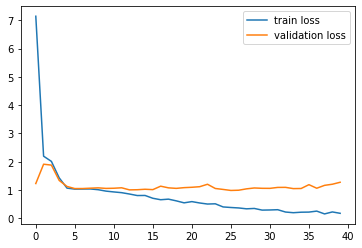

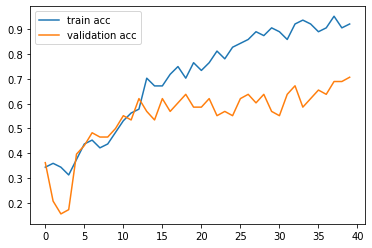

<Figure size 432x288 with 0 Axes>

In [9]:
# plot the loss
plt.plot(history.history['loss'], label = 'train loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.legend()
plt.show()
plt.savefig('./figures/Loss')

#plot the accuracy
plt.plot(history.history['accuracy'], label = 'train acc')
plt.plot(history.history['val_accuracy'], label = 'validation acc')
plt.legend()
plt.show()
plt.savefig('./figures/Accuracy')

In [10]:
from tensorflow.keras.models import model_from_json

model_json = model.to_json()
with open('./model/carbrand_cnn.json', 'w') as json_file:
    json_file.write(model_json)
    
model.save_weights('./model/carbrand_cnn.h5')
print('Saved model to disk!')

# load the model from json file
json_file = open('./model/carbrand_cnn.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
model.load_weights('./model/carbrand_cnn.h5')
print('Loaded model from disk!')

Saved model to disk!
Loaded model from disk!


In [11]:
# predicting the test set
y_pred = model.predict(validation_generator)

y_pred = np.argmax(y_pred, axis = 1)
y_pred

array([2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 0, 2, 0, 2, 2, 1, 2, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 2, 1, 0, 1, 0, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2,
       1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 2, 1, 1, 0])

In [12]:
# load and use the model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img
import numpy as np
from glob import glob

In [13]:
folders = glob('./data/Train/*')
labels = []

for path in folders:
    l = path.split('/')
    label = l[-1].upper()
    labels.append(label)
labels.sort()
print(labels)

['AUDI', 'LAMBORGHINI', 'MERCEDES']


AUDI


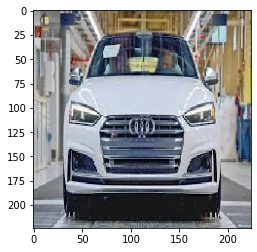

In [14]:
def Predict_Brand(image_path, image_size = [224, 224], labels = labels, model = model):
    img = load_img(image_path, target_size = image_size)
    x = image.img_to_array(img).astype(float)
    x = x / 255.
    x = np.expand_dims(x, axis = 0)
    result = model.predict(x)
    result = np.argmax(result, axis = 1)
    return labels[result[0]]

result = Predict_Brand('./data/Test/audi/25.jpg')
img = load_img('./data/Test/audi/25.jpg', target_size = [224,224])
plt.imshow(img)
print(result)